In [1]:
import pandas as pd
import networkx as nx

In [2]:
student_data = pd.read_csv("synthetic_student_data.csv")

In [4]:
student_data.head()

,StudentID,Academic_Performance,isolated,WomenDifferent,language,COVID,criticises,MenBetterSTEM,pwi_wellbeing,Intelligence1,...,k6_4,k6_5,k6_6,Manbox5_overall,Masculinity_contrained,GrowthMindset,k6_overall,School_support_engage,Friends,Friends_Count
0,S0001,61,3,4,0,4,1,2,8,6,...,1,1,1,2.2,3.75,2.5,7,4.50,"S0260, S0282, S0993, S0955, S0724",5
1,S0002,53,6,5,1,4,4,2,1,5,...,5,1,1,5.4,3.75,5.0,17,4.00,"S0480, S0819, S0325",3
2,S0003,62,3,6,0,2,1,3,0,3,...,1,3,1,4.0,4.00,5.5,15,4.75,"S0356, S0942, S0978, S0556",4
3,S0004,96,3,2,1,2,2,2,0,1,...,3,4,2,2.0,3.25,5.0,19,2.75,"S0725, S0124, S0879, S0177, S0738, S0648, S0105",7
4,S0005,68,5,6,0,7,2,7,3,4,...,2,2,5,4.0,4.75,3.0,18,4.75,"S0627, S0454, S0098, S0028",4


In [5]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   StudentID               1000 non-null   object 
 1   Academic_Performance    1000 non-null   int64  
 2   isolated                1000 non-null   int64  
 3   WomenDifferent          1000 non-null   int64  
 4   language                1000 non-null   int64  
 5   COVID                   1000 non-null   int64  
 6   criticises              1000 non-null   int64  
 7   MenBetterSTEM           1000 non-null   int64  
 8   pwi_wellbeing           1000 non-null   int64  
 9   Intelligence1           1000 non-null   int64  
 10  Intelligence2           1000 non-null   int64  
 11  Soft                    1000 non-null   int64  
 12  opinion                 1000 non-null   int64  
 13  Nerds                   1000 non-null   int64  
 14  comfortable             1000 non-null   i

In [4]:
# Step 1: Check for missing values
student_data.isnull().sum()

StudentID                   0
Academic_Performance        0
isolated                    0
WomenDifferent              0
language                    0
COVID                       0
criticises                  0
MenBetterSTEM               0
pwi_wellbeing               0
Intelligence1               0
Intelligence2               0
Soft                        0
opinion                     0
Nerds                       0
comfortable                 0
future                      0
bullying                    0
Manbox5_1                   0
Manbox5_2                   0
Manbox5_3                   0
Manbox5_4                   0
Manbox5_5                   0
k6_1                        0
k6_2                        0
k6_3                        0
k6_4                        0
k6_5                        0
k6_6                        0
Manbox5_overall             0
Masculinity_contrained      0
GrowthMindset               0
k6_overall                  0
School_support_engage       0
Friends   

In [6]:
# Step 2: Clean the 'Friends' column safely
student_data['Friends'] = student_data['Friends'].fillna('')  # Fill NaN with empty string

# Convert to list only if it's a string
student_data['Friends'] = student_data['Friends'].apply(
    lambda x: [] if x == '' else (x if isinstance(x, list) else x.split(','))
)

In [7]:
# Step 3: Check for dulicate values
student_data_no_friends = student_data.drop(columns=['Friends'])
duplicate_rows = student_data[student_data_no_friends.duplicated()]
print(f"Duplicate rows found (excluding 'Friends'): {len(duplicate_rows)}")

duplicate_ids = student_data[student_data.duplicated(subset='StudentID')]
print(f"Duplicate StudentIDs found: {len(duplicate_ids)}")

Duplicate rows found (excluding 'Friends'): 0
Duplicate StudentIDs found: 0


In [8]:
# Step 4: Check basic statistical summary to find outliers or weird values
student_data.describe()

,Academic_Performance,isolated,WomenDifferent,language,COVID,criticises,MenBetterSTEM,pwi_wellbeing,Intelligence1,Intelligence2,...,k6_3,k6_4,k6_5,k6_6,Manbox5_overall,Masculinity_contrained,GrowthMindset,k6_overall,School_support_engage,Friends_Count
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,70.360000,3.965000,3.973000,0.222000,3.992000,3.96500,4.073000,4.865000,3.95900,3.952000,...,3.002000,2.855000,3.012000,3.023000,4.004600,4.00950,4.044500,17.830000,3.986500,3.504000
std,14.478053,2.037136,1.924571,0.415799,1.979863,1.99744,1.987365,3.167777,2.00033,1.983338,...,1.376914,1.401406,1.376136,1.436849,0.900505,1.00208,1.436431,3.482704,1.019918,2.308097
min,23.000000,1.000000,1.000000,0.000000,1.000000,1.00000,1.000000,0.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.400000,1.25000,1.000000,7.000000,1.000000,0.000000
25%,60.000000,2.000000,2.000000,0.000000,2.000000,2.00000,2.000000,2.000000,2.00000,2.000000,...,2.000000,2.000000,2.000000,2.000000,3.400000,3.25000,3.000000,16.000000,3.250000,1.000000
50%,70.000000,4.000000,4.000000,0.000000,4.000000,4.00000,4.000000,5.000000,4.00000,4.000000,...,3.000000,3.000000,3.000000,3.000000,4.000000,4.00000,4.000000,18.000000,4.000000,3.000000
75%,80.000000,6.000000,6.000000,0.000000,6.000000,6.00000,6.000000,7.000000,6.00000,6.000000,...,4.000000,4.000000,4.000000,4.000000,4.600000,4.75000,5.000000,20.000000,4.750000,6.000000
max,100.000000,7.000000,7.000000,1.000000,7.000000,7.00000,7.000000,10.000000,7.00000,7.000000,...,5.000000,5.000000,5.000000,5.000000,7.000000,6.75000,7.000000,28.000000,7.000000,7.000000


In [9]:
# Step 5: Create the required fields
processed_data = student_data.copy()

# Create the fields
processed_data['Wellbeing_Score'] = processed_data['pwi_wellbeing']
processed_data['Friendliness_Score'] = processed_data['School_support_engage']
processed_data['Bullying_Score'] = processed_data['criticises']
processed_data['Composite_Score'] = (
    0.5 * processed_data['Academic_Performance'] +
    0.3 * processed_data['Wellbeing_Score'] +
    0.2 * processed_data['Friendliness_Score']
)
processed_data['Is_Bully'] = processed_data['Bullying_Score'] >= 5

# Show the first few rows to confirm
processed_data[['StudentID', 'Academic_Performance', 'Wellbeing_Score', 
                'Friendliness_Score', 'Bullying_Score', 'Composite_Score', 'Is_Bully']].head()

,StudentID,Academic_Performance,Wellbeing_Score,Friendliness_Score,Bullying_Score,Composite_Score,Is_Bully
0,S0001,61,8,4.50,1,33.80,False
1,S0002,53,1,4.00,4,27.60,False
2,S0003,62,0,4.75,1,31.95,False
3,S0004,96,0,2.75,2,48.55,False
4,S0005,68,3,4.75,2,35.85,False


In [10]:
# Step 6: Create Social Network Graph
# Load the dataset
student_data = pd.read_csv("synthetic_student_data.csv")

# Initialize the graph
G = nx.Graph()

# Add nodes
G.add_nodes_from(student_data["StudentID"])

# Add edges from the 'Friends' column
for _, row in student_data.iterrows():
    student = row["StudentID"]
    if pd.notna(row["Friends"]):
        friends = [f.strip() for f in row["Friends"].split(",")]
        for friend in friends:
            G.add_edge(student, friend)

# Print basic stats
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Is the graph connected?", nx.is_connected(G))

Number of nodes: 1000
Number of edges: 3499
Is the graph connected? False


In [11]:
components = list(nx.connected_components(G))
print(f"Number of connected components: {len(components)}")

Number of connected components: 6


In [12]:
# Degree Centrality
degree_centrality = nx.degree_centrality(G)
student_data["degree_centrality"] = student_data["StudentID"].map(degree_centrality)

# Clustering Coefficient
clustering = nx.clustering(G)
student_data["clustering"] = student_data["StudentID"].map(clustering)

# Component Label (which cluster the student belongs to)
component_map = {}
for i, comp in enumerate(components):
    for node in comp:
        component_map[node] = i
student_data["component_id"] = student_data["StudentID"].map(component_map)

# Preview the updated table
student_data[["StudentID", "degree_centrality", "clustering", "component_id"]].head(10)

,StudentID,degree_centrality,clustering,component_id
0,S0001,0.007007,0.000000,0
1,S0002,0.006006,0.000000,0
2,S0003,0.007007,0.000000,0
3,S0004,0.011011,0.000000,0
4,S0005,0.005005,0.000000,0
5,S0006,0.009009,0.000000,0
6,S0007,0.004004,0.166667,0
7,S0008,0.006006,0.000000,0
8,S0009,0.007007,0.047619,0
9,S0010,0.008008,0.035714,0


In [13]:
import numpy as np
import random
import pandas as pd

class StudentAssignmentEnv:
    def __init__(self, students_df, n_classes=4):
        self.students = students_df.copy()
        self.classrooms = {f"Class_{i}": [] for i in range(n_classes)}
        self.n_classes = n_classes
        self.reset()

    def reset(self):
        self.classrooms = {f"Class_{i}": [] for i in range(self.n_classes)}
        # Sort students by Composite Score descending
        self.unassigned_students = self.students.sort_values(by='Composite_Score', ascending=False).index.tolist()
        return self._get_state()

    def _get_state(self):
        state = {
            'classroom_sizes': [len(cls) for cls in self.classrooms.values()],
            'unassigned': self.unassigned_students.copy()
        }
        return state

    def step(self, action_classroom):
        if not self.unassigned_students:
            return self._get_state(), 0, True

        student_idx = self.unassigned_students.pop(0)
        student = self.students.loc[student_idx]
        self.classrooms[action_classroom].append(student_idx)

        done = len(self.unassigned_students) == 0

        if done:
            reward, academic_std, wellbeing_std, bullying_penalty = self._calculate_reward()
        else:
            reward, academic_std, wellbeing_std, bullying_penalty = 0, 0, 0, 0

        return self._get_state(), reward, done, academic_std, wellbeing_std, bullying_penalty

    def _calculate_reward(self):
        academic_scores = []
        wellbeing_scores = []
        bullying_risks = []
        total_students = sum(len(cls) for cls in self.classrooms.values())

        for cls_indices in self.classrooms.values():
            if not cls_indices:
                continue
            cls_students = self.students.loc[cls_indices]
            sampled_students = cls_students.sample(n=min(20, len(cls_students)))
            academic_scores.append(sampled_students['Academic_Performance'].mean())
            wellbeing_scores.append(sampled_students['Wellbeing_Score'].mean())
            bullying_risks.append(sampled_students['Is_Bully'].sum())

        academic_std = np.std(academic_scores)
        wellbeing_std = np.std(wellbeing_scores)
        bullying_penalty = sum(bullying_risks) / max(total_students, 1)

        # Clamp values to prevent explosion
        academic_std = min(academic_std, 10)
        wellbeing_std = min(wellbeing_std, 5)

        reward = -((academic_std / 100) + (wellbeing_std / 10) + bullying_penalty)
        return reward, academic_std, wellbeing_std, bullying_penalty

In [25]:
# Dummy student dataset for testing
n_students = 100
students_df = pd.DataFrame({
    'Composite_Score': np.random.uniform(0, 100, n_students),
    'Academic_Performance': np.random.uniform(60, 100, n_students),
    'Wellbeing_Score': np.random.uniform(5, 10, n_students),
    'Is_Bully': np.random.choice([0, 1], size=n_students, p=[0.9, 0.1])
})

# Instantiate the environment
env = StudentAssignmentEnv(students_df, n_classes=4)

# Reset environment
state = env.reset()
done = False

# Random assignment of students to classrooms
while not done:
    random_class = f"Class_{random.randint(0, env.n_classes - 1)}"
    state, reward, done, academic_std, wellbeing_std, bullying_penalty = env.step(random_class)

# Print the final results
print("Test Environment Completed")
print(f"Final Reward: {reward:.4f}")
print(f"Academic Std Deviation: {academic_std:.2f}")
print(f"Wellbeing Std Deviation: {wellbeing_std:.2f}")
print(f"Bullying Penalty: {bullying_penalty:.4f}")

Test Environment Completed
Final Reward: -0.1222
Academic Std Deviation: 1.68
Wellbeing Std Deviation: 0.25
Bullying Penalty: 0.0800


In [3]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install --upgrade typing_extensions

Note: you may need to restart the kernel to use updated packages.


Episode 10:
  Total Normalized Reward: 991.96
  Academic Std Deviation: 1.39
  Wellbeing Std Deviation: 0.33
  Bullying Penalty: 0.0700
----------------------------------------
Episode 20:
  Total Normalized Reward: 990.40
  Academic Std Deviation: 2.21
  Wellbeing Std Deviation: 0.28
  Bullying Penalty: 0.0800
----------------------------------------
Episode 30:
  Total Normalized Reward: 991.42
  Academic Std Deviation: 3.63
  Wellbeing Std Deviation: 0.18
  Bullying Penalty: 0.0600
----------------------------------------
Episode 40:
  Total Normalized Reward: 993.68
  Academic Std Deviation: 1.81
  Wellbeing Std Deviation: 0.27
  Bullying Penalty: 0.0500
----------------------------------------
Episode 50:
  Total Normalized Reward: 991.31
  Academic Std Deviation: 2.28
  Wellbeing Std Deviation: 0.43
  Bullying Penalty: 0.0700
----------------------------------------
Episode 60:
  Total Normalized Reward: 994.11
  Academic Std Deviation: 1.22
  Wellbeing Std Deviation: 0.19
  Bull

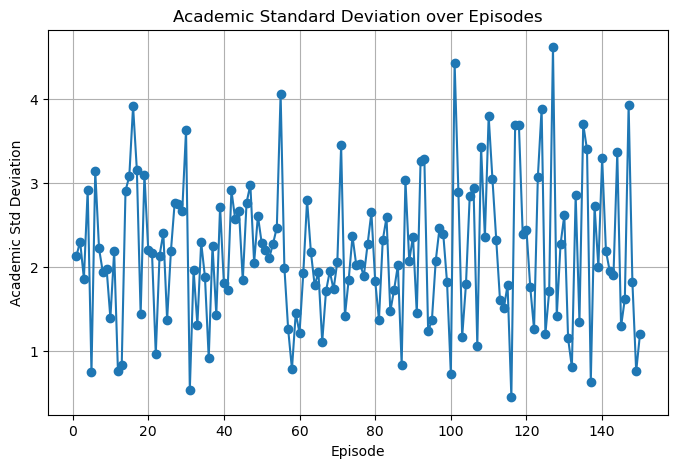

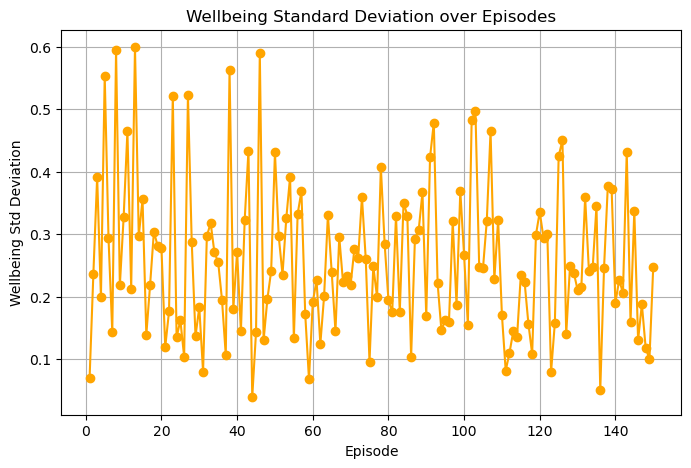

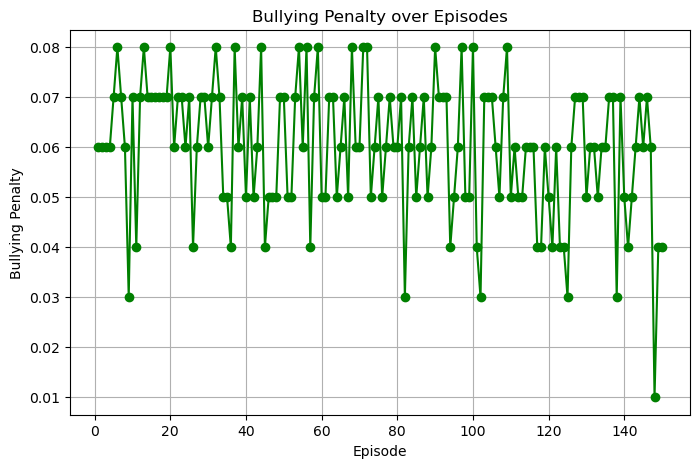

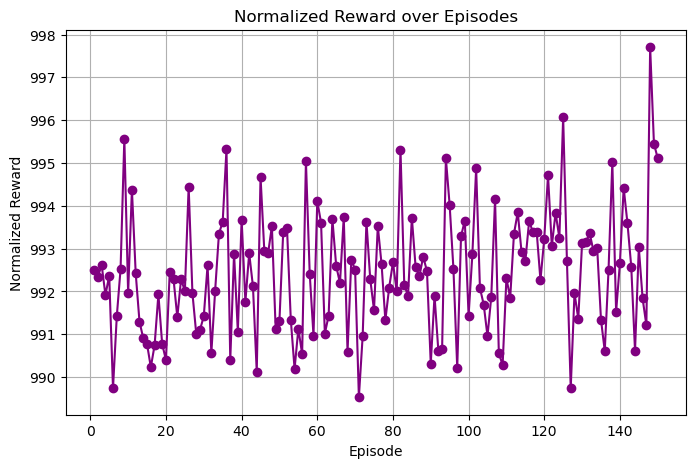

In [27]:
# ----------------------------------
# 1. Import Libraries
# ----------------------------------
import torch
import torch.nn as nn
import torch.optim as optim
import random
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------------
# 2. Define DQN Model
# ----------------------------------
class DQNModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQNModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

# ----------------------------------
# 3. Define DQN Agent
# ----------------------------------
class DQNAgent:
    def __init__(self, input_dim, output_dim, lr=0.001, gamma=0.9, epsilon=1.0, epsilon_decay=0.995, epsilon_min=0.01):
        self.model = DQNModel(input_dim, output_dim)
        self.target_model = DQNModel(input_dim, output_dim)
        self.optimizer = optim.Adam(self.model.parameters(), lr=lr)
        self.criterion = nn.MSELoss()
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        self.output_dim = output_dim

    def choose_action(self, state):
        if random.random() < self.epsilon:
            return random.randint(0, self.output_dim - 1)
        else:
            state_tensor = torch.FloatTensor(state).unsqueeze(0)
            q_values = self.model(state_tensor)
            return torch.argmax(q_values).item()

    def train_step(self, state, action, reward, next_state, done):
        state_tensor = torch.FloatTensor(state).unsqueeze(0)
        next_state_tensor = torch.FloatTensor(next_state).unsqueeze(0)
        reward_tensor = torch.FloatTensor([reward])
        action_tensor = torch.LongTensor([action])

        q_value = self.model(state_tensor).gather(1, action_tensor.unsqueeze(1)).squeeze(1)
        next_q_value = self.target_model(next_state_tensor).max(1)[0]
        expected_q_value = reward_tensor + (1 - int(done)) * self.gamma * next_q_value

        loss = self.criterion(q_value, expected_q_value.detach())

        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

    def update_target(self):
        self.target_model.load_state_dict(self.model.state_dict())

    def decay_epsilon(self):
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

# ----------------------------------
# 4. Train the DQN Agent
# ----------------------------------
n_episodes = 150  # Longer training

agent = DQNAgent(input_dim=4, output_dim=4, epsilon_min=0.01)  # 🔥 Lower epsilon_min

academic_stds = []
wellbeing_stds = []
bullying_penalties = []
normalized_rewards = []

for episode in range(n_episodes):
    state_data = env.reset()
    total_custom_reward = 0
    done = False
    steps = 0

    academic_std_episode = 0
    wellbeing_std_episode = 0
    bullying_penalty_episode = 0

    while not done:
        classroom_sizes = np.array(state_data['classroom_sizes']) / 10000  # Normalize
        action = agent.choose_action(classroom_sizes)

        next_state_data, _, done, academic_std, wellbeing_std, bullying_penalty = env.step(f"Class_{action}")
        next_classroom_sizes = np.array(next_state_data['classroom_sizes']) / 10000

        # Updated stronger reward calculation
        custom_reward = (
            0.7 * (1 - min(academic_std, 5) / 10) +   # Stronger academic penalty + cap academic std
            0.2 * (1 - wellbeing_std / 10) +
            0.1 * (1 - bullying_penalty * 100)
        )

        agent.train_step(classroom_sizes, action, custom_reward, next_classroom_sizes, done)

        total_custom_reward += custom_reward
        state_data = next_state_data
        steps += 1

        academic_std_episode = academic_std
        wellbeing_std_episode = wellbeing_std
        bullying_penalty_episode = bullying_penalty

    normalized_reward = (total_custom_reward / steps) * 1000  # Smooth reward scale
    normalized_rewards.append(normalized_reward)
    academic_stds.append(academic_std_episode)
    wellbeing_stds.append(wellbeing_std_episode)
    bullying_penalties.append(bullying_penalty_episode)

    agent.decay_epsilon()

    if (episode + 1) % 10 == 0:
        agent.update_target()
        print(f"Episode {episode + 1}:")
        print(f"  Total Normalized Reward: {normalized_reward:.2f}")
        print(f"  Academic Std Deviation: {academic_std_episode:.2f}")
        print(f"  Wellbeing Std Deviation: {wellbeing_std_episode:.2f}")
        print(f"  Bullying Penalty: {bullying_penalty_episode:.4f}")
        print("-" * 40)

# ----------------------------------
# 5. Plotting Results
# ----------------------------------

episodes = np.arange(1, n_episodes + 1)

plt.figure(figsize=(8, 5))
plt.plot(episodes, academic_stds, marker='o')
plt.title('Academic Standard Deviation over Episodes')
plt.xlabel('Episode')
plt.ylabel('Academic Std Deviation')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(episodes, wellbeing_stds, marker='o', color='orange')
plt.title('Wellbeing Standard Deviation over Episodes')
plt.xlabel('Episode')
plt.ylabel('Wellbeing Std Deviation')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(episodes, bullying_penalties, marker='o', color='green')
plt.title('Bullying Penalty over Episodes')
plt.xlabel('Episode')
plt.ylabel('Bullying Penalty')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(episodes, normalized_rewards, marker='o', color='purple')
plt.title('Normalized Reward over Episodes')
plt.xlabel('Episode')
plt.ylabel('Normalized Reward')
plt.grid(True)
plt.show()

Episode 159:
  Total Normalized Reward: 992.44
  Academic Std Deviation: 2.14
  Wellbeing Std Deviation: 0.30
  Bullying Penalty: 0.0600
----------------------------------------
Episode 169:
  Total Normalized Reward: 990.26
  Academic Std Deviation: 3.87
  Wellbeing Std Deviation: 0.16
  Bullying Penalty: 0.0700
----------------------------------------
Episode 179:
  Total Normalized Reward: 992.84
  Academic Std Deviation: 3.02
  Wellbeing Std Deviation: 0.25
  Bullying Penalty: 0.0500
----------------------------------------
Episode 189:
  Total Normalized Reward: 992.87
  Academic Std Deviation: 1.55
  Wellbeing Std Deviation: 0.21
  Bullying Penalty: 0.0600
----------------------------------------
Episode 199:
  Total Normalized Reward: 992.94
  Academic Std Deviation: 2.87
  Wellbeing Std Deviation: 0.23
  Bullying Penalty: 0.0500
----------------------------------------
Episode 209:
  Total Normalized Reward: 991.31
  Academic Std Deviation: 3.79
  Wellbeing Std Deviation: 0.17


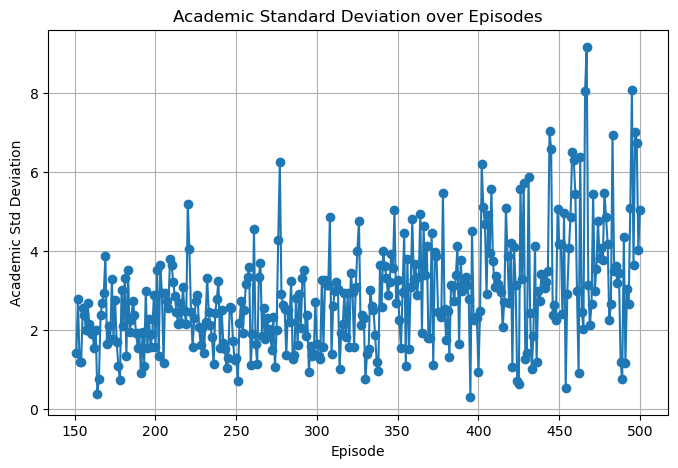

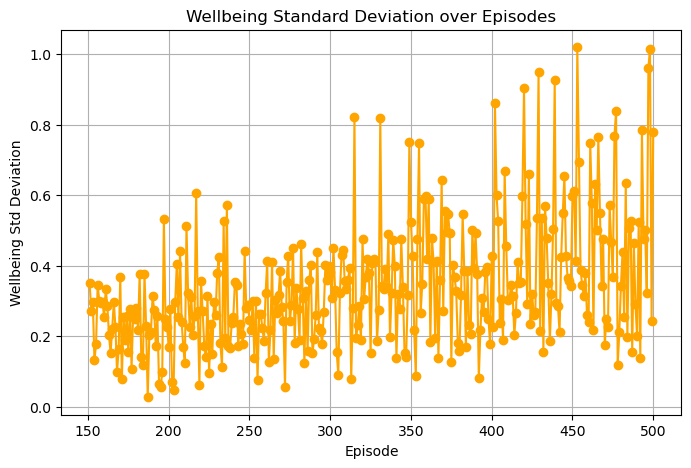

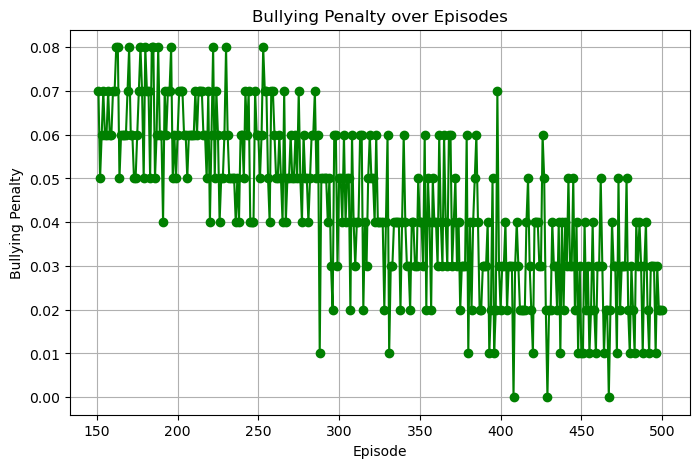

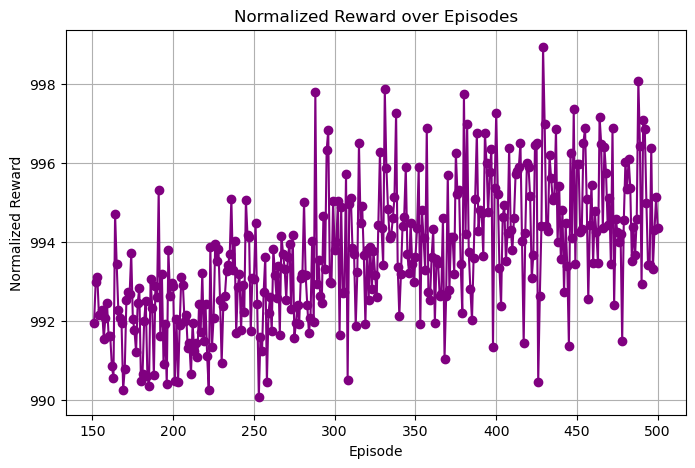

In [29]:
# ----------------------------------
# 1. Import Libraries
# ----------------------------------
import torch
import torch.nn as nn
import torch.optim as optim
import random
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------------
# 2. Define DQN Model
# ----------------------------------
class DQNModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQNModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

# ----------------------------------
# 3. Define DQN Agent
# ----------------------------------
class DQNAgent:
    def __init__(self, input_dim, output_dim, lr=0.0005, gamma=0.9, epsilon=1.0, epsilon_decay=0.995, epsilon_min=0.01):
        self.model = DQNModel(input_dim, output_dim)
        self.target_model = DQNModel(input_dim, output_dim)
        self.optimizer = optim.Adam(self.model.parameters(), lr=lr)
        self.criterion = nn.MSELoss()
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        self.output_dim = output_dim

    def choose_action(self, state):
        if random.random() < self.epsilon:
            return random.randint(0, self.output_dim - 1)
        else:
            state_tensor = torch.FloatTensor(state).unsqueeze(0)
            q_values = self.model(state_tensor)
            return torch.argmax(q_values).item()

    def train_step(self, state, action, reward, next_state, done):
        state_tensor = torch.FloatTensor(state).unsqueeze(0)
        next_state_tensor = torch.FloatTensor(next_state).unsqueeze(0)
        reward_tensor = torch.FloatTensor([reward])
        action_tensor = torch.LongTensor([action])

        q_value = self.model(state_tensor).gather(1, action_tensor.unsqueeze(1)).squeeze(1)
        next_q_value = self.target_model(next_state_tensor).max(1)[0]
        expected_q_value = reward_tensor + (1 - int(done)) * self.gamma * next_q_value

        loss = self.criterion(q_value, expected_q_value.detach())

        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

    def update_target(self):
        self.target_model.load_state_dict(self.model.state_dict())

    def decay_epsilon(self):
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

# ----------------------------------
# 4. Continue Training from Episode 150
# ----------------------------------
# Set up for continued training from episode 150
n_episodes = 500  # Total number of episodes to run

agent = DQNAgent(input_dim=4, output_dim=4, epsilon_min=0.01)  # Reduced learning rate for fine-tuning
academic_stds = []
wellbeing_stds = []
bullying_penalties = []
normalized_rewards = []

# Load previous model state (after 150 episodes)
# agent.model.load_state_dict(torch.load('model_after_150_episodes.pth'))  # Uncomment if you have saved the model after 150 episodes

for episode in range(151, n_episodes + 1):  # Continue training from episode 151
    state_data = env.reset()
    total_custom_reward = 0
    done = False
    steps = 0

    academic_std_episode = 0
    wellbeing_std_episode = 0
    bullying_penalty_episode = 0

    while not done:
        classroom_sizes = np.array(state_data['classroom_sizes']) / 10000  # Normalize
        action = agent.choose_action(classroom_sizes)

        next_state_data, _, done, academic_std, wellbeing_std, bullying_penalty = env.step(f"Class_{action}")
        next_classroom_sizes = np.array(next_state_data['classroom_sizes']) / 10000

        # Updated stronger reward calculation
        custom_reward = (
            0.7 * (1 - min(academic_std, 5) / 10) +   # Stronger academic penalty + cap academic std
            0.2 * (1 - wellbeing_std / 10) +
            0.1 * (1 - bullying_penalty * 100)
        )

        agent.train_step(classroom_sizes, action, custom_reward, next_classroom_sizes, done)

        total_custom_reward += custom_reward
        state_data = next_state_data
        steps += 1

        academic_std_episode = academic_std
        wellbeing_std_episode = wellbeing_std
        bullying_penalty_episode = bullying_penalty

    normalized_reward = (total_custom_reward / steps) * 1000  # Smooth reward scale
    normalized_rewards.append(normalized_reward)
    academic_stds.append(academic_std_episode)
    wellbeing_stds.append(wellbeing_std_episode)
    bullying_penalties.append(bullying_penalty_episode)

    agent.decay_epsilon()

    if (episode + 1) % 10 == 0:
        agent.update_target()
        print(f"Episode {episode}:")
        print(f"  Total Normalized Reward: {normalized_reward:.2f}")
        print(f"  Academic Std Deviation: {academic_std_episode:.2f}")
        print(f"  Wellbeing Std Deviation: {wellbeing_std_episode:.2f}")
        print(f"  Bullying Penalty: {bullying_penalty_episode:.4f}")
        print("-" * 40)

    # Save the model after training every 50 episodes to avoid losing progress
    if (episode + 1) % 50 == 0 or episode == 499:
        torch.save(agent.model.state_dict(), f"model_after_{episode + 1}_episodes.pth")


# ----------------------------------
# 5. Plotting Results
# ----------------------------------

episodes = np.arange(151, n_episodes + 1)

plt.figure(figsize=(8, 5))
plt.plot(episodes, academic_stds, marker='o')
plt.title('Academic Standard Deviation over Episodes')
plt.xlabel('Episode')
plt.ylabel('Academic Std Deviation')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(episodes, wellbeing_stds, marker='o', color='orange')
plt.title('Wellbeing Standard Deviation over Episodes')
plt.xlabel('Episode')
plt.ylabel('Wellbeing Std Deviation')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(episodes, bullying_penalties, marker='o', color='green')
plt.title('Bullying Penalty over Episodes')
plt.xlabel('Episode')
plt.ylabel('Bullying Penalty')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(episodes, normalized_rewards, marker='o', color='purple')
plt.title('Normalized Reward over Episodes')
plt.xlabel('Episode')
plt.ylabel('Normalized Reward')
plt.grid(True)
plt.show()

In [ ]:
# Evaluation

Episode 1:
  Normalized Reward: 998.00
  Academic Std Deviation: 0.00
  Wellbeing Std Deviation: 0.00
  Bullying Penalty: 0.0200
----------------------------------------
Episode 2:
  Normalized Reward: 999.00
  Academic Std Deviation: 0.00
  Wellbeing Std Deviation: 0.00
  Bullying Penalty: 0.0100
----------------------------------------
Episode 3:
  Normalized Reward: 997.00
  Academic Std Deviation: 0.00
  Wellbeing Std Deviation: 0.00
  Bullying Penalty: 0.0300
----------------------------------------
Episode 4:
  Normalized Reward: 999.00
  Academic Std Deviation: 0.00
  Wellbeing Std Deviation: 0.00
  Bullying Penalty: 0.0100
----------------------------------------
Episode 5:
  Normalized Reward: 998.00
  Academic Std Deviation: 0.00
  Wellbeing Std Deviation: 0.00
  Bullying Penalty: 0.0200
----------------------------------------
Episode 6:
  Normalized Reward: 999.00
  Academic Std Deviation: 0.00
  Wellbeing Std Deviation: 0.00
  Bullying Penalty: 0.0100
---------------------

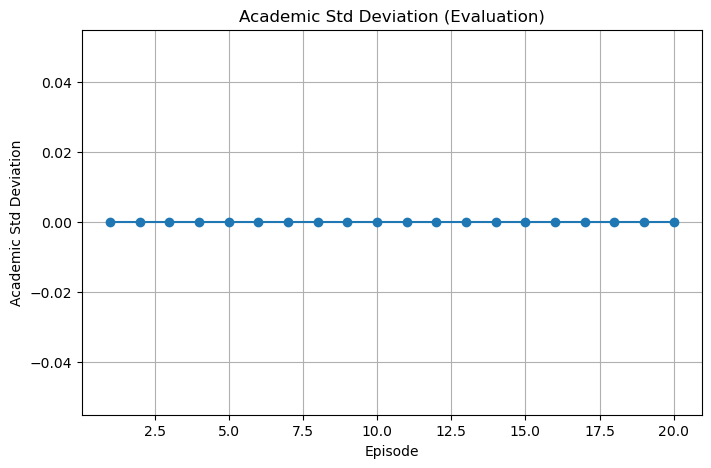

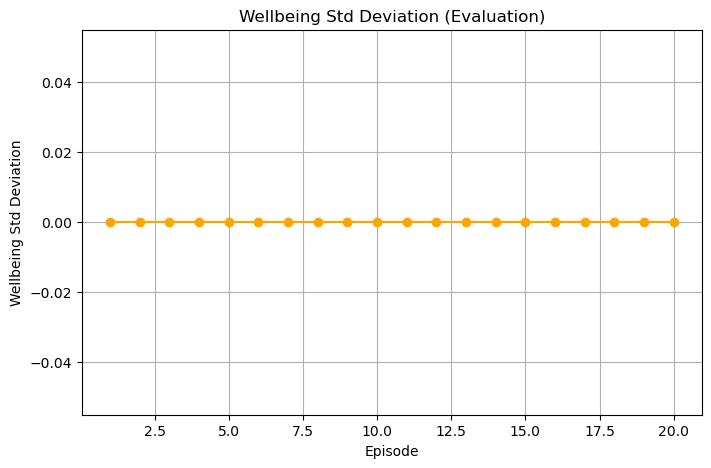

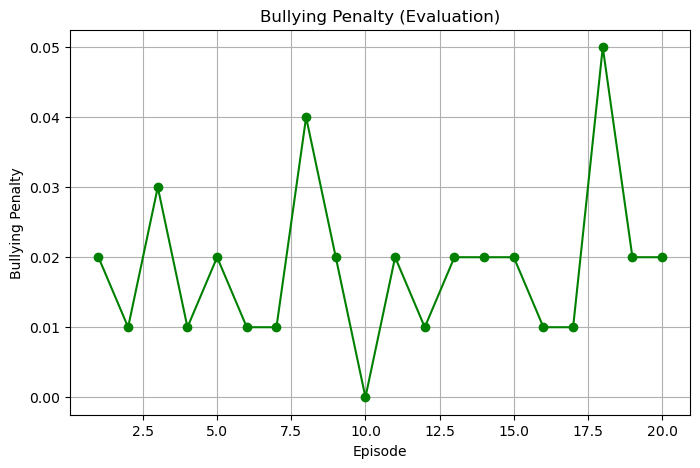

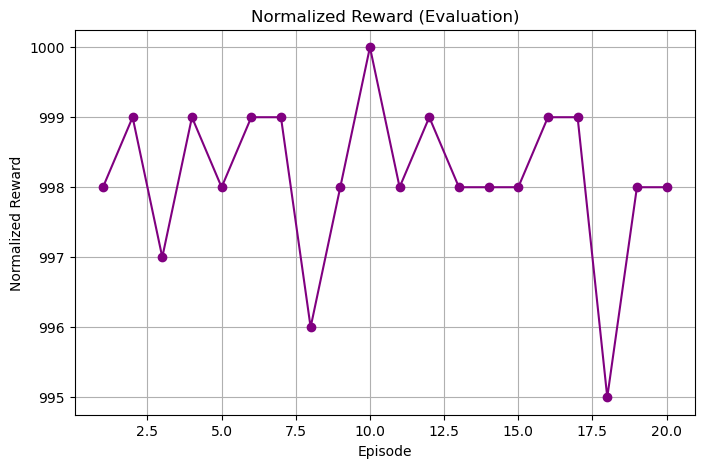

Average over evaluation episodes:
  Avg Reward: 998.15
  Avg Academic Std: 0.00
  Avg Wellbeing Std: 0.00
  Avg Bullying Penalty: 0.0185


In [30]:
# ---------------------------------------------------------
# 1. Import Libraries
# ---------------------------------------------------------
import torch
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------------------------
# 2. Load DQN Model and Agent Classes
# (Assumes these are defined as in your training script)
# ---------------------------------------------------------

# Define the DQN model (same as training)
import torch.nn as nn

class DQNModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQNModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

# Define the agent
class DQNAgent:
    def __init__(self, input_dim, output_dim):
        self.model = DQNModel(input_dim, output_dim)
        self.output_dim = output_dim
        self.epsilon = 0.0  # Evaluation: no exploration

    def choose_action(self, state):
        state_tensor = torch.FloatTensor(state).unsqueeze(0)
        q_values = self.model(state_tensor)
        return torch.argmax(q_values).item()

# ---------------------------------------------------------
# 3. Load Trained Model
# ---------------------------------------------------------

agent = DQNAgent(input_dim=4, output_dim=4)
agent.model.load_state_dict(torch.load('model_after_500_episodes.pth'))
agent.model.eval()

# ---------------------------------------------------------
# 4. Define Evaluation Loop
# ---------------------------------------------------------

# Assuming you have access to the same `env` as in training
# Replace this with your actual environment initialization
# e.g., from your_env_file import env
# env = YourEnvironment()

n_eval_episodes = 20
academic_stds = []
wellbeing_stds = []
bullying_penalties = []
normalized_rewards = []

for episode in range(n_eval_episodes):
    state_data = env.reset()
    total_custom_reward = 0
    steps = 0
    done = False

    while not done:
        classroom_sizes = np.array(state_data['classroom_sizes']) / 10000
        action = agent.choose_action(classroom_sizes)
        next_state_data, _, done, academic_std, wellbeing_std, bullying_penalty = env.step(f"Class_{action}")
        next_classroom_sizes = np.array(next_state_data['classroom_sizes']) / 10000

        custom_reward = (
            0.7 * (1 - min(academic_std, 5) / 10) +
            0.2 * (1 - wellbeing_std / 10) +
            0.1 * (1 - bullying_penalty * 100)
        )

        total_custom_reward += custom_reward
        state_data = next_state_data
        steps += 1

    normalized_reward = (total_custom_reward / steps) * 1000
    normalized_rewards.append(normalized_reward)
    academic_stds.append(academic_std)
    wellbeing_stds.append(wellbeing_std)
    bullying_penalties.append(bullying_penalty)

    print(f"Episode {episode + 1}:")
    print(f"  Normalized Reward: {normalized_reward:.2f}")
    print(f"  Academic Std Deviation: {academic_std:.2f}")
    print(f"  Wellbeing Std Deviation: {wellbeing_std:.2f}")
    print(f"  Bullying Penalty: {bullying_penalty:.4f}")
    print("-" * 40)

# ---------------------------------------------------------
# 5. Plot Results
# ---------------------------------------------------------

episodes = np.arange(1, n_eval_episodes + 1)

plt.figure(figsize=(8, 5))
plt.plot(episodes, academic_stds, marker='o')
plt.title('Academic Std Deviation (Evaluation)')
plt.xlabel('Episode')
plt.ylabel('Academic Std Deviation')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(episodes, wellbeing_stds, marker='o', color='orange')
plt.title('Wellbeing Std Deviation (Evaluation)')
plt.xlabel('Episode')
plt.ylabel('Wellbeing Std Deviation')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(episodes, bullying_penalties, marker='o', color='green')
plt.title('Bullying Penalty (Evaluation)')
plt.xlabel('Episode')
plt.ylabel('Bullying Penalty')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(episodes, normalized_rewards, marker='o', color='purple')
plt.title('Normalized Reward (Evaluation)')
plt.xlabel('Episode')
plt.ylabel('Normalized Reward')
plt.grid(True)
plt.show()

# Optionally print overall averages
print("Average over evaluation episodes:")
print(f"  Avg Reward: {np.mean(normalized_rewards):.2f}")
print(f"  Avg Academic Std: {np.mean(academic_stds):.2f}")
print(f"  Avg Wellbeing Std: {np.mean(wellbeing_stds):.2f}")
print(f"  Avg Bullying Penalty: {np.mean(bullying_penalties):.4f}")

In [32]:
torch.save(agent.model.state_dict(), "final_trained_model.pth")